# 项目：调查数据集（未前往就诊的挂号预约:巴西预约挂号求诊信息）

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## 数据整理



### 常规属性

In [2]:
df=pd.read_csv('noshowappointments.csv')

In [3]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


~1.PatientId float64->int64
2.ScheduledDay object(String)->datetime
3.AppointmentDay object(String)->datetime

~No-show->no_show and each name of the columns should be lowercase

In [5]:
np.sum(df.isnull())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

~There is no missing value in the whole dataframe 

In [6]:
np.sum(df.duplicated())

0

~There is no duplicated rows in the dataframe

### 数据清理（数据转换/属性书写形式）

！！！ 1.PatientId float64->int64 2.ScheduledDay object(String)->datetime 3.AppointmentDay object(String)->datetime

In [7]:
df['PatientId']=df['PatientId'].astype('int64')
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


~1.PatientId float64->int64 2.ScheduledDay object(String)->datetime 3.AppointmentDay object(String)->datetime  (DONE)

！！！No-show->no_show and each name of the columns should be lowercase

In [9]:
df.rename(columns=lambda x:x.lower(),inplace=True)

In [10]:
df.rename(columns={'no-show':'no_show'},inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null int64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


In [12]:
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


No-show->no_show and each name of the columns should be lowercase（DONE)

In [13]:
df_copy=df.copy()

create a photocopy for futher exploratory research

<a id='eda'></a>
## 探索性数据分析



### 研究问题 1（有哪些重要因素能够帮助我们预测患者是否会按照其挂号预约前往医院就诊 ）

In [14]:
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


patientid,appointmentid,scheduledday,appointmentday seem to have nearly little  effect on no_show decision.So for exploratory discussion,I drop them.

In [15]:
df.drop(['patientid','appointmentid','scheduledday','appointmentday'],axis=1,inplace=True)

In [16]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [17]:
df.loc[df['no_show']=='No','no_show']=0

In [18]:
df.loc[df['no_show']=='Yes','no_show']=1

In [19]:
df['no_show']=df['no_show'].astype('int')

use 0 to represent No and 1 to represent Yes 

In [20]:
df.head(1)

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0


In [21]:
df['no_show'].value_counts()/np.sum(df['no_show'].value_counts())

0    0.798067
1    0.201933
Name: no_show, dtype: float64

neighbourhood->no_show ?

In [22]:
s=df.groupby('neighbourhood').mean()['no_show']

In [23]:
s[s==s.max()]

neighbourhood
ILHAS OCEÂNICAS DE TRINDADE    1.0
Name: no_show, dtype: float64

In [24]:
df.loc[df['neighbourhood']=='ILHAS OCEÂNICAS DE TRINDADE']

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
48754,F,51,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,1
48765,F,58,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,1


The amount of this sample is too small that it can not illustrate that some neighbourhood leads to more patients to attend.

In [25]:
np.sum(df.groupby('neighbourhood').mean()['no_show']>=0.25)

5

In [26]:
s[df.groupby('neighbourhood').mean()['no_show']>=0.25]

neighbourhood
ILHAS OCEÂNICAS DE TRINDADE    1.000000
ITARARÉ                        0.262664
SANTA CECÍLIA                  0.274554
SANTA CLARA                    0.264822
SANTOS DUMONT                  0.289185
Name: no_show, dtype: float64

Guess:these five neighborhoods(hospital location)may provide better aid

In [27]:
np.sum((df.groupby('neighbourhood').mean()['no_show']>=0) &(df.groupby('neighbourhood').mean()['no_show']<0.1))

2

In [28]:
s[(df.groupby('neighbourhood').mean()['no_show']>=0) &(df.groupby('neighbourhood').mean()['no_show']<0.1)]


neighbourhood
ILHA DO BOI          0.085714
PARQUE INDUSTRIAL    0.000000
Name: no_show, dtype: float64

In [29]:
len(df[df['neighbourhood']=='ILHA DO BOI'])

35

'no_show<0.1'may indicates that the hospital is not welcomed or the mount of sample is small.
neighbourhood:ILHA DO BOI is not welcomed while SANTA CECÍLIA,SANTA CLARA,SANTOS DUMONT etc.. are welcomed

There are only 5 neighbourhoods(hospital location) which have more than 1/4 patients to attend their appointments.The sample is too small and the mean of no_show is almost ranging from 0.1 to 0.3.So neighbourhood plays a nonsignificant role in no_show decision.

In [30]:
df=df.drop('neighbourhood',axis=1)

AGE

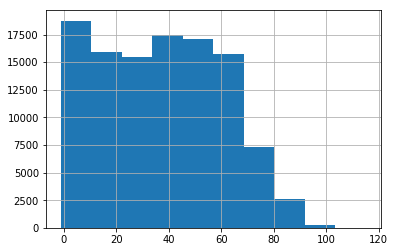

In [31]:
df['age'].hist()

In [32]:
df0=df.loc[df['no_show']==0]
df1=df.loc[df['no_show']==1]

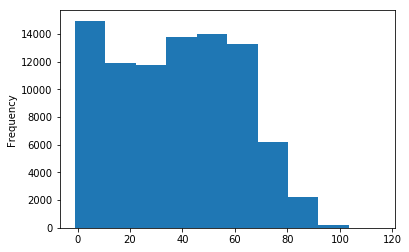

In [33]:
df0['age'].plot(kind='hist')

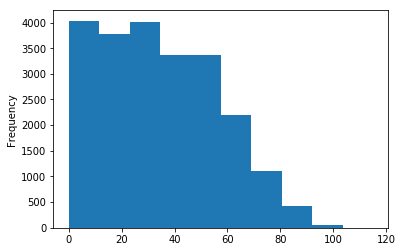

In [34]:
df1['age'].plot(kind='hist')

df0 indicates "no" appointments and df1 indicates "yes" appointments.As you can see,these is almost no difference between df0,df1 and df
descendant age between 60-70 from df1 and df2 and ascendant from 10-30 may illustrate some.I'll talk about age later by using 'cut' function.


In [35]:
df.drop('age',axis=1,inplace=True)

In [36]:
df.head(1)

,gender,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,0,1,0,0,0,0,0


Famale:0   Male:1  convert gender(F,M) to 1,0

In [37]:
df.loc[df['gender']=='F','gender']=0
df.loc[df['gender']=='M','gender']=1

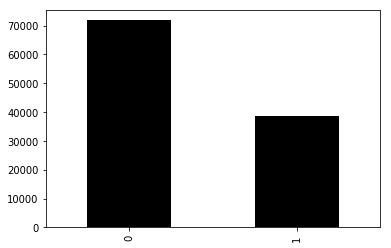

In [41]:
df['gender'].value_counts().plot(kind='bar',color='black')

In [42]:
df.groupby(['gender','no_show']).describe().iloc[:,0]/df.groupby('gender').count().iloc[:,1]

gender  no_show
0       0          0.796854
        1          0.203146
1       0          0.800321
        1          0.199679
dtype: float64

Gender has little correlation with no_show attribute.

In [43]:
df.drop('gender',axis=1,inplace=True)

scholarship   guess:1 tend to see the doc and 0 not

In [44]:
df['scholarship'].value_counts()

0    99666
1    10861
Name: scholarship, dtype: int64

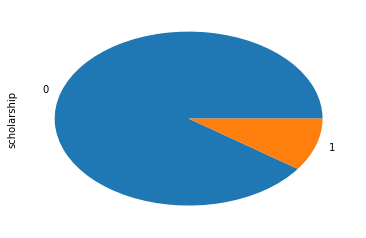

In [45]:
df['scholarship'].value_counts().plot(kind='pie')

In [46]:
df.groupby('scholarship').mean()

,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
scholarship,,,,,,
0,0.199837,0.073987,0.028415,0.022706,0.320842,0.198072
1,0.173465,0.052389,0.048614,0.018046,0.322714,0.237363


Surely,when the scholarship value=1,individual tends to see the doctor than 0

In [47]:
df.drop('scholarship',axis=1,inplace=True)
df.head(1)

,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,1,0,0,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e4cd39f98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8e4d2f59b0>]], dtype=object)

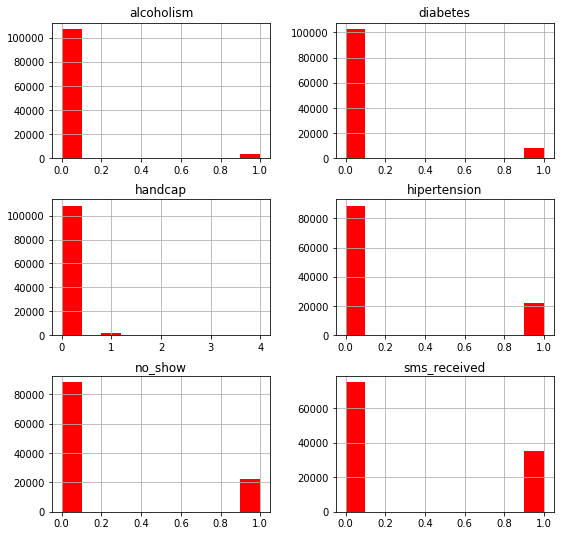

In [48]:
df.hist(figsize=(9,9),color='r')

hipertension,diabetes,alcoholism and handcap indicate that most of people are healthy so that people tend not to see doctor.
hipertension,diabetes,alcoholism and are three differents disease.I add them up as one attribute:disease

In [53]:
df['disease']=df['hipertension']+df['diabetes']+df['alcoholism']

In [54]:
df['disease'].value_counts()

0    85312
1    17582
2     7377
3      256
Name: disease, dtype: int64

I take the sample of 0 disease and 3 diseases for learning

In [55]:
df_0=df[df['disease']==0]
df_3=df[df['disease']==3]

In [56]:
df['no_show'].value_counts()/np.sum(df['no_show'].value_counts())

0    0.798067
1    0.201933
Name: no_show, dtype: float64

The whole proportion of this dataframe on no_show

In [57]:
df_0['no_show'].value_counts()/np.sum(df.loc[df['disease']==0,'no_show'].value_counts())

0    0.790909
1    0.209091
Name: no_show, dtype: float64

The proportion on no_show when the sum of disease is 0

In [58]:
df_3['no_show'].value_counts()/np.sum(df.loc[df['disease']==3,'no_show'].value_counts())

0    0.820312
1    0.179688
Name: no_show, dtype: float64

In [59]:
df_p_0=df_0['no_show'].value_counts()/np.sum(df.loc[df['disease']==0,'no_show'].value_counts())
df_p_3=df_3['no_show'].value_counts()/np.sum(df.loc[df['disease']==3,'no_show'].value_counts())


Text(0,0.5,' rate')

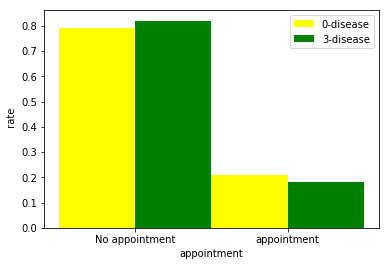

In [60]:
ind = np.arange(2)             
width = 0.5
plt.bar(ind,df_p_0.values,width,color = 'yellow',label = '0-disease')  
plt.bar(ind+width,df_p_3.values,width,color = 'g',label = '3-disease') # ind+width adjusts the left start location of the bar.
plt.xticks(np.arange(2) + width/2, ('No appointment','appointment'))
plt.legend()
plt.xlabel('appointment')
plt.ylabel(' rate')

The proportion on no_show when the sum of disease is 3

AS you can see,the amount of people tending to see the doctor increases when the sum of diseases decreases,strange

In [61]:
df.drop(['hipertension','diabetes','alcoholism'],axis=1,inplace=True)

In [62]:
df.drop('disease',axis=1,inplace=True)

In [66]:
df.corr()

,handcap,sms_received,no_show
handcap,1.000000,-0.024161,-0.006076
sms_received,-0.024161,1.000000,0.126431
no_show,-0.006076,0.126431,1.000000


no significant correaltion

HandCAP

In [67]:
df['handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

In [68]:
df.groupby('handcap').mean()['no_show']

handcap
0    0.202353
1    0.179236
2    0.202186
3    0.230769
4    0.333333
Name: no_show, dtype: float64

As you can see from statistical data,bigger handcap standard(more serious)leads to higher posibility on seeing a doctoc.Some people who are not handcapped tend to be more careful about their health.

In [69]:
df.drop('handcap',axis=1,inplace=True)

sms_received   message receive

In [70]:
df['sms_received'].value_counts()

0    75045
1    35482
Name: sms_received, dtype: int64

In [71]:
df['no_show_st']=df['no_show']

In [72]:
(df.groupby(['sms_received','no_show']).count()/df.groupby(['sms_received']).count()).loc[:,'no_show_st']

sms_received  no_show
0             0          0.832967
              1          0.167033
1             0          0.724255
              1          0.275745
Name: no_show_st, dtype: float64

It can inferred that someone who received message would have bigger posibility to see the doctor.

From what has been discussed above,I can indicate that there are at least six attributes contributing the choice to see the doc or not
1.sms_received
2.handcap
3.sum of diseases
4.scholarship
5.age has slight effect on no_show
6.neighboorhood

### 研究问题 2（各种疾病之间的关系，疾病和年龄以及性别的关系）

In [73]:
#use photocopy 
df=df_copy

In [74]:
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [75]:
df.drop(['patientid','appointmentid','scheduledday','appointmentday','neighbourhood','scholarship','sms_received','no_show'],axis=1,inplace=True)

In [76]:
df.head(1)

,gender,age,hipertension,diabetes,alcoholism,handcap
0,F,62,1,0,0,0


In [77]:
df.loc[df['gender']=='F','gender']=0
df.loc[df['gender']=='M','gender']=1

In [78]:
df['gender']=df['gender'].astype('int64')

In [79]:
df.describe()

,gender,age,hipertension,diabetes,alcoholism,handcap
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,0.350023,37.088874,0.197246,0.071865,0.030400,0.022248
std,0.476979,23.110205,0.397921,0.258265,0.171686,0.161543
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,115.000000,1.000000,1.000000,1.000000,4.000000


In [80]:
df.corr()

,gender,age,hipertension,diabetes,alcoholism,handcap
gender,1.000000,-0.106440,-0.055718,-0.032554,0.106167,0.022814
age,-0.106440,1.000000,0.504586,0.292391,0.095811,0.078033
hipertension,-0.055718,0.504586,1.000000,0.433086,0.087971,0.080083
diabetes,-0.032554,0.292391,0.433086,1.000000,0.018474,0.057530
alcoholism,0.106167,0.095811,0.087971,0.018474,1.000000,0.004648
handcap,0.022814,0.078033,0.080083,0.057530,0.004648,1.000000


In [81]:
df['age_new']=pd.qcut(df['age'],7,labels=[1,2,3,4,5,6,7]) #3,5,7,9 try

In [82]:
df['age_new']=df['age_new'].astype('int64')

In [83]:
df.corr()

,gender,age,hipertension,diabetes,alcoholism,handcap,age_new
gender,1.000000,-0.106440,-0.055718,-0.032554,0.106167,0.022814,-0.103286
age,-0.106440,1.000000,0.504586,0.292391,0.095811,0.078033,0.983825
hipertension,-0.055718,0.504586,1.000000,0.433086,0.087971,0.080083,0.500696
diabetes,-0.032554,0.292391,0.433086,1.000000,0.018474,0.057530,0.293484
alcoholism,0.106167,0.095811,0.087971,0.018474,1.000000,0.004648,0.102996
handcap,0.022814,0.078033,0.080083,0.057530,0.004648,1.000000,0.070179
age_new,-0.103286,0.983825,0.500696,0.293484,0.102996,0.070179,1.000000


Age has relatively strong correlation with hipertension and diabetes than the other diseases and it does not work when you cut 'age' into 3,5,7 or 9 pieces


hipertension has a relatively strong correlation with diabetes than the others,that is,hipertension may lead to diabetes.

In [84]:
df['disease']=df['hipertension']+df['diabetes']

In [85]:
df.drop(['hipertension','diabetes'],axis=1,inplace=True)

In [86]:
df.drop(['age'],axis=1,inplace=True)

In [87]:
df.head(1)

,gender,alcoholism,handcap,age_new,disease
0,0,0,0,6,1


In [88]:
df_=df.groupby('age_new').sum()

Text(0,0.5,' people')

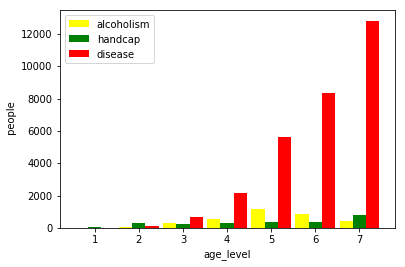

In [89]:
ind = np.arange(7)             
width = 0.3
plt.bar(ind,df_['alcoholism'].values,width,color = 'yellow',label = 'alcoholism')  
plt.bar(ind+width,df_['handcap'].values,width,color = 'g',label = 'handcap')
plt.bar(ind+2*width,df_['disease'].values,width,color = 'r',label = 'disease')# ind+width adjusts the left start location of the bar.
plt.xticks(np.arange(7) + width, ('1','2','3','4','5','6','7'))
plt.legend()
plt.xlabel('age_level')
plt.ylabel(' people')

Unlike alcoholism and handcap,disease grows fast when people get old

In [90]:
df.groupby('gender').mean()

,alcoholism,handcap,age_new,disease
gender,,,,
0,0.017024,0.019543,4.123385,0.291551
1,0.055238,0.027270,3.690439,0.227441


Famale tends to get more diseases than male but male has bigger probability to be addicted to alcoholism

In [91]:
df.groupby('alcoholism').mean()

,gender,handcap,age_new,disease
alcoholism,,,,
0,0.341056,0.022115,3.935381,0.262068
1,0.636012,0.026488,5.134821,0.493750


elder people tend tp be addicted to alcoholism than young people and alcoholism may lead to more diseases and also, male has bigger probability to be addicted to alcoholism than female.

In [92]:
df.groupby('handcap').mean()

,gender,alcoholism,age_new,disease
handcap,,,,
0,0.348485,0.030309,3.949947,0.262056
1,0.421645,0.034280,5.069050,0.606758
2,0.426230,0.027322,4.633880,0.693989
3,0.769231,0.230769,5.153846,0.076923
4,0.666667,0.000000,2.000000,0.000000


no obvious finding about handcap

In [115]:
(df.groupby(['gender','disease']).sum()/df.groupby('gender').count()).loc[:,'alcoholism']

gender  disease
0       0          0.010175
        1          0.005554
        2          0.001295
1       0          0.031690
        1          0.019335
        2          0.004213
Name: alcoholism, dtype: float64

As you can see,I can infer from this statistical data that female with healthy body tend to care about a healthier livestyle (no alcohol)than male.

<a id='conclusions'></a>
## 结论
    Indication:All the conclusion is contemporary and not concrete because of the small amount of dataset and no significantly strong corraltion between no_show and the other attributes or within all the attributes.SO,I can just find some regular patterns within this dataset and all the conclusion is based on inferrence.
    
    1.From what has been discussed above in the first question,I can indicate that there are at least six attributes contributing to the choice to see the doc or not to some degree.Six discoverred factors are listed below:
    1.sms_received 2.handcap 3.the sum of diseases 4.scholarship 5.age has slight effect on no_show decision 6.neighborhood(hospital location)
   
    Detailed information:
    1.sms_received(0/1) when people received message,they tended to see the doctor.
    2.handcap:bigger handcap standard(more serious)leads to higher posibility on seeing a doctoc
    3.the sum of diseases:people tend not to see the doctor when they got more diseases.strange.
    4.scholarship:people who received scholarship from government tend to see the doctor.
    5.age:slight effect on decision.not obvious.
    6.neighborhood(hospital location)contribute to the decision.
    
    
    2.From question 2:
    1.Age has relatively strong correlation with hipertension and diabetes than the other diseases and it does not work well when I cut 'age' into 3,5,7 or 9 pieces to study correlation between factors.
    2.hipertension has a relatively strong correlation with diabetes than the others,that is,hipertension may lead to diabetes to some degree.
    3.Unlike alcoholism and handcap,disease grows fast when people get old
    4.Famale tends to get more diseases than male but male has bigger probability to be addicted to alcoholism
    5.elder people tend to be addicted to alcoholism than young people and alcoholism may lead to more diseases.
    6.female with healthy body tend to care about a healthier livestyle (no alcohol)than male